# Repositorio

Se puede consultar la metodología de desarrollo del proyecto y el histórico de imágenes en el siguiente repositorio:

- https://github.com/luperezsal/DM-Classification-Tree

[Dataset](https://github.com/JeffSackmann/tennis_atp)

In [219]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

# Directory and version specifications

Se definiarán variables globales como los directorios desde donde se leen los datos, directorios donde se guardan los resultados y el timestamp para guardar los archivos generados de cada ejecución indiviudal.

In [220]:
from datetime import datetime

MODEL_TIMESTAMP = datetime.now().strftime("%Y-%m-%d__%H-%M-%S")

DATA_PATH = 'data/'

CLASSIFICATION_REPORTS_PATH = 'classification_reports/'
CONFUSION_MATRIX_PATH = 'confusion_matrix/'
CLASSIFICATION_TREE_PATH = 'tree/classification/'
AUC_ROC_PATH = 'auc-roc_curves/'

# Resolución de imágenes
resolution = 300

random_state = 2

# Download and Store Data

Se crea un método para descargar todos los datos de partidos pertenecientes al siguiente repositorio de [Github JeffSackmann/tennis_atp](https://github.com/JeffSackmann/tennis_atp) y posterior guardado de los csv.

In [221]:
# for index in range(0,22):
#     index_str = str(index)

#     print(index_str)
    
#     if len(index_str) == 1:
#         index_str = '0' + index_str

#     print(index_str)

#     url = "https://raw.githubusercontent.com/JeffSackmann/tennis_atp/master/atp_matches_20{}.csv".format(index_str)
#     print(url)

#     FILE_NAME = "atp_matches_20{}.csv".format(index_str)

#     df = pd.read_csv(url, index_col=0, parse_dates=[0])
#     df.to_csv(DATA_PATH + FILE_NAME)

# # data_frame = pd.read_csv(DATA_PATH + FILE_NAME)

# Load Data

Métod para cargar todos los datos de los partidos (desde el año 2000 hasta el 2022) en un único csv `atp`.

In [222]:
atp = pd.DataFrame()

years_index_20_22 = range(0,22)

for index in years_index_20_22:
    index_str = str(index)

    if len(index_str) == 1:
        index_str = '0' + index_str

    FILE_NAME = "atp_matches_20{}.csv".format(index_str)

    data_frame_iter = pd.read_csv(DATA_PATH + FILE_NAME)
    atp = pd.concat([atp, data_frame_iter])

pd.set_option('display.max_columns', None)
df_classification = atp
atp

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,loser_id,loser_seed,loser_entry,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
0,2000-301,Auckland,Hard,32,A,20000110,1,103163,1.0,NaN,Tommy Haas,R,188.0,GER,21.771389,101543,NaN,NaN,Jeff Tarango,L,180.0,USA,31.137577,7-5 4-6 7-5,3,R32,108.0,18.0,4.0,96.0,49.0,39.0,28.0,17.0,3.0,5.0,7.0,8.0,106.0,55.0,39.0,29.0,17.0,4.0,7.0,11.0,1612.0,63.0,595.0
1,2000-301,Auckland,Hard,32,A,20000110,2,102607,NaN,Q,Juan Balcells,R,190.0,ESP,24.558522,102644,NaN,NaN,Franco Squillari,L,183.0,ARG,24.386037,7-5 7-5,3,R32,85.0,5.0,3.0,76.0,52.0,39.0,13.0,12.0,5.0,6.0,5.0,10.0,74.0,32.0,25.0,18.0,12.0,3.0,6.0,211.0,157.0,49.0,723.0
2,2000-301,Auckland,Hard,32,A,20000110,3,103252,NaN,NaN,Alberto Martin,R,175.0,ESP,21.390828,102238,NaN,NaN,Alberto Berasategui,R,173.0,ESP,26.535250,6-3 6-1,3,R32,56.0,0.0,0.0,55.0,35.0,25.0,12.0,8.0,1.0,1.0,0.0,6.0,56.0,33.0,20.0,7.0,8.0,7.0,11.0,48.0,726.0,59.0,649.0
3,2000-301,Auckland,Hard,32,A,20000110,4,103507,7.0,NaN,Juan Carlos Ferrero,R,183.0,ESP,19.909651,103819,NaN,NaN,Roger Federer,R,185.0,SUI,18.422998,6-4 6-4,3,R32,68.0,5.0,1.0,53.0,28.0,26.0,15.0,10.0,0.0,0.0,11.0,2.0,70.0,43.0,29.0,14.0,10.0,6.0,8.0,45.0,768.0,61.0,616.0
4,2000-301,Auckland,Hard,32,A,20000110,5,102103,NaN,Q,Michael Sell,R,180.0,USA,27.381246,102765,4.0,NaN,Nicolas Escude,R,185.0,FRA,23.770021,0-6 7-6(7) 6-1,3,R32,115.0,1.0,2.0,98.0,66.0,39.0,14.0,13.0,6.0,11.0,8.0,8.0,92.0,46.0,34.0,18.0,12.0,5.0,9.0,167.0,219.0,34.0,873.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2722,2021-M-DC-2021-WG2-M-THA-DEN-01,Davis Cup WG2 R1: THA vs DEN,Hard,4,D,20210917,4,200416,NaN,NaN,August Holmgren,R,NaN,DEN,23.394935,106397,NaN,NaN,Wishaya Trongcharoenchaikul,R,NaN,THA,26.433949,6-4 6-4,3,RR,90.0,3.0,3.0,52.0,29.0,22.0,16.0,10.0,0.0,1.0,8.0,2.0,79.0,45.0,30.0,14.0,10.0,10.0,13.0,905.0,16.0,767.0,27.0
2723,2021-M-DC-2021-WG2-M-THA-DEN-01,Davis Cup WG2 R1: THA vs DEN,Hard,4,D,20210917,5,208937,NaN,NaN,Kasidit Samrej,R,NaN,THA,20.629706,134087,NaN,NaN,Johannes Ingildsen,R,NaN,DEN,24.202601,7-5 6-3,3,RR,88.0,6.0,6.0,58.0,28.0,21.0,13.0,11.0,3.0,7.0,5.0,8.0,76.0,43.0,24.0,13.0,10.0,5.0,11.0,1136.0,8.0,1546.0,2.0
2724,2021-M-DC-2021-WG2-M-TUR-LAT-01,Davis Cup WG2 R1: TUR vs LAT,Hard,4,D,20210918,1,123795,NaN,NaN,Altug Celikbilek,U,NaN,TUR,25.015743,207669,NaN,NaN,Robert Strombachs,U,NaN,GER,21.995893,7-6(4) 6-4,3,RR,124.0,6.0,8.0,80.0,34.0,25.0,23.0,11.0,6.0,8.0,3.0,5.0,97.0,50.0,34.0,20.0,11.0,6.0,9.0,170.0,427.0,671.0,38.0
2725,2021-M-DC-2021-WG2-M-TUR-LAT-01,Davis Cup WG2 R1: TUR vs LAT,Hard,4,D,20210918,2,117356,NaN,NaN,Cem Ilkel,R,185.0,TUR,26.064339,105208,NaN,NaN,Ernests Gulbis,R,190.0,LAT,33.037645,6-4 6-1,3,RR,65.0,2.0,2.0,41.0,27.0,23.0,7.0,9.0,0.0,1.0,1.0,5.0,45.0,21.0,16.0,7.0,8.0,2.0,7.0,176.0,408.0,196.0,359.0


El objetivo de la sección de clasificación es averiguar el tipo de pista en la que se ha jugado el partido en función de una serie de variables, esto puede cobrar sentido ya que dependiendo de la superficie de la pista la velocidad con la que rebota la pelota es distinta, y por lo tanto puede influir en las variables del juego.

A continuación analizaremos los campos de importancia que se utilizarán en este proyecto de cara a los experimentos:


- `surface`: tipo de superficie de la pista en la que se ha jugado el partido, exiten cuatro tipos de pista:
    - **Clay**: Tierra batida.
    - **Hard**: Pista dura.
    - **Carpet**: Moqueta.
    - **Grass**: Césped.
- `minutes`: número de minutos transcurridos en el partido.
- `winner_ht, loser_ht`: altura del jugador ganador y del perdedor respectivamente.
- `w_ace, l_ace`: número de aces (saques directos) del ganador y del perdedor respectivamente.
- `w_svpt, l_svpt`: número de saques (service points) del ganador y del perdedor respectivamente.
- `w_1stWon, l_1stWon`: número de puntos ganados con primer saque (1st service) del ganador y del perdedor respectivamente.
- `w_2ndWon, l_2ndWon`: número de puntos ganados con segundo saque (2nd service) del ganador y del perdedor respectivamente.
- `w_bpSaved, l_bpSaved`: número puntos de rotura de servicio (break points) que ha neutralizado el ganador y el perdedor respectivamente.
- `w_bpFaced, l_bpFaced`: número puntos de rotura de servicio (break points) que han surfido el ganador y el perdedor respectivamente.
- `w_SvGms, l_SvGms`: número de juegos ganados con servicio propio del ganador y perdedor respectivamente.
- `winner_rank_points, loser_rank_points`: número de puntos en el ranking de la ATP del ganador y el perdedor.
- `round`: ronda en la que se ha jugado el partido dentro del torneo.



# Clean Dataset

Comenzaremos con la limpieza del dataset, donde obtendremos los campos mencionados en el apartado anterior:

In [ ]:
COLUMNS_TO_GET = [
                  "surface",
                  "minutes",
                  "winner_ht", "loser_ht",
                  "w_ace", "l_ace",
                  "w_svpt", "l_svpt", # service points
                  "w_1stWon", "l_1stWon",
                  "w_2ndWon", "l_2ndWon",
                  "w_bpSaved", "l_bpSaved",
                  "w_bpFaced", "l_bpFaced",
                  "w_SvGms", "l_SvGms", # service games won
                  "winner_rank_points", "loser_rank_points",
                  "round",
                 ]



Comenzaremos con la limpieza del dataset, donde obtendremos los campos mencionados en el apartado anterior:

In [ ]:
COLUMNS_TO_GET = [
                  "surface",
                  "minutes",
                  "winner_ht", "loser_ht",
                  "w_ace", "l_ace",
                  "w_svpt", "l_svpt", # service points
                  "w_1stWon", "l_1stWon",
                  "w_2ndWon", "l_2ndWon",
                  "w_bpSaved", "l_bpSaved",
                  "w_bpFaced", "l_bpFaced",
                  "w_SvGms", "l_SvGms", # service games won
                  "winner_rank_points", "loser_rank_points",
                  "round",
                 ]

Eliminaremos aquellas filas donde el toreno no sigue la estructura habitual de la mayoría de competiciones, como son los torneos Round Robin (RR,ER,BR).

In [224]:
df_classification = df_classification.loc[:, df_classification.columns.isin(COLUMNS_TO_GET)]

df_classification = df_classification[df_classification['round'] != 'RR']
df_classification = df_classification[df_classification['round'] != 'ER']
df_classification = df_classification[df_classification['round'] != 'BR']

df_classification = df_classification.dropna()

A continuación trataremos el campo `round` y lo transformaermos a numérico para que el árbol de decisión pueda tomar elecciones en función de la ronda del torneo a la que pertenece cada partido.

In [225]:
round_replace = {'R128': 128,
                  'R64': 64,
                  'R32': 32,
                  'R16': 16,
                  'QF': 4,
                  'SF': 2,
                  'F': 1
}

# Eliminamos las Round Robin (RR y ER)
df_classification['round'].replace(round_replace, inplace = True)

# Split Data

Dividiremos los datos del dataframe en conjunto de entrenamiento y conjunto de test.

In [226]:
from sklearn.model_selection import train_test_split

df_classification_train, df_classification_test = train_test_split(df_classification, test_size = 0.3, random_state = random_state)

y_train = df_classification_train["surface"]
X_train = df_classification_train.drop(columns = ["surface"])

y_test = df_classification_test["surface"]
X_test = df_classification_test.drop(columns = ["surface"])

# Sesgos

En el dataset podemos observar que existe un sesgo en función del tipo de pista. Gran parte de los partidos se juegan en pista dura, que es menos costosa de mantener que las pistas de hierba y de moqueta. Este desbalanceo de datos podría afectar notablemente a las predicciones del modelo ya que aprendería más de aquellas muestras más numerosas en el conjunto de datos que del resto de ellas. Por lo tanto tendría una tendencia a predecir la superficie de la pista como dura, reduciendo la efectividad de las clases menos numerosas en el dataset.

In [227]:
y_train.value_counts()

Hard      20338
Clay      12237
Grass      4067
Carpet      976
Name: surface, dtype: int64

Debido a este problema, aplicaremos distintas técnicas de Resampling sobre el conjunto de entrenamiento. Estas técnicas permiten operar sobre el conjunto de datos para balancearlo, con el objetivo de que el modelo no se vea muy afectado debido a la diferencia de las clases mayoritarias respecto a las minoritarias.

Aplicaremos distintas metodologías de Resampling:
- **Undersampling**
- **Upsampling**
- **Generación de datos sintéticos**
- **Generación de datos sintéticos aplicando Undersampling**

[Metodologías de Resampling](https://towardsdatascience.com/5-techniques-to-work-with-imbalanced-data-in-machine-learning-80836d45d30c)

## Undersampling Data

El objetivo es eliminar muestras del conjunto de datos para crear un dataset con el mismo número de muestras de cada clase, esto lo conseguimos especificando la estrategia de `not minority` en nuestro [RandomUnderSampler](https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.RandomUnderSampler.html).

In [228]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(sampling_strategy = 'not minority',
                         random_state = random_state)

Una vez realizado el downsampling podemos comprobar que el número de muestras de cada clase es la misma, por lo tanto podemos comenzar a entrenar los modelos evitando el problema de desbalanceo.

In [229]:
X_testing_undersampler, y_testing_undersampler = rus.fit_resample(X_train, y_train)
y_testing_undersampler.value_counts()

Carpet    976
Clay      976
Grass     976
Hard      976
Name: surface, dtype: int64

## Upsampling Data

Al contrario que en el caso anterior, con el método
[RandomOverSampler](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.RandomOverSampler.html)
construimos un nuevo dataset que estará formado por el muestreo de instancias de las clases que no sean la mayoritaria, de tal forma que resultará en un nuevo dataset con un número igual de muestras para cada clase, igualando a la mayoritaria. Esto se realiza mediante la estrategia `not majority`.



In [230]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(sampling_strategy = 'not majority',
                        random_state = random_state)

Hacemos un test del método y podemos comprobar que existen el mismo número de muestras para cada una de las clases, igualando el número de muestras mayoritario que existían en el dataset de entrenamiento original.

In [231]:
X_testing_uppersampler, y_testing_uppersampler = ros.fit_resample(X_train, y_train)
y_testing_uppersampler.value_counts()

Clay      20338
Hard      20338
Grass     20338
Carpet    20338
Name: surface, dtype: int64

## Syntethic Data (Borderline SMOTE-2)

Otro de los enfoques es la genereación de datos sintéticos de las clases minoritarias, difiere del upsampling en que se aplican variaciones a las muestras duplicadas de las clases minoritarias. Para lograr este comportamiento aplicaremos la técnica [Borderline SMOTE-2](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html) de la librería Imbalanced Learn, configurando el tipo SMOTE a `borderline-2`.

In [232]:
from imblearn.over_sampling import BorderlineSMOTE

smote2 = BorderlineSMOTE(kind = 'borderline-2',
                         random_state = random_state)

Hacemos un testing para comprobar que los datos sintéticos generados igualan el número de clases de las muestras mayoritarias.

In [233]:
X_testing_smote2, y_testing_smote2 = smote2.fit_resample(X_train, y_train)
y_testing_smote2.value_counts()

Clay      20338
Hard      20338
Carpet    20338
Grass     20337
Name: surface, dtype: int64

## Syntethic Data - Undersampling (SMOTEENN)

El método
[SMOTEEN](https://imbalanced-learn.org/stable/references/generated/imblearn.combine.SMOTEENN.html)
combina dos técnicas vistas anterioremente, la generación de datos sintéticos mediante SMOTE y aplicando técnicas de undersampling. En este caso probaremos a generar datos sintéticos de las clases minoritarias para invertir el número de muestras de cada clase, es decir, igualaremos la clase minoritaria, generando datos sintéticos, a la clase mayoritaria y ésta será reducida a un número de muestras aproximado a la clase minoritaria original. Esto se hace para cada clase que esté presente en el dataset.

In [234]:
from imblearn.combine import SMOTEENN 

smoteenn = SMOTEENN(random_state = random_state)

Testamos los datos que se han generado y comprobamos que el número de las distintas clases se ha invertido respecto al dataset de entrenamiento original.

In [ ]:
X_testing_smoteenn, y_testing_smoteenn = smoteenn.fit_resample(X_train, y_train)
y_testing_smoteenn.value_counts()

# Decision Tree with CV

A continuación definiremos un método para encontrar la profundidad óptima del árbol de decisión (con rangos de profundidad desde 2 hasta 15) en función de las distintas técnicas de resampling definidas anteriormente aplicando la técnica cross-validation.

Para ello, en cada iteración de cross-validation, aplicaremos cada uno de los métodos de Resampling distintos sobre la división realizada en el conjunto de entrenamiento original.

Seguiremos los siguientes pasos:

1. Para cada profundidad del rango de profundidades (2-15) realizaremos un cross-validation sobre el conjunto de entrenamiento original.
2. Cross-validation divide el conjunto de entrenamiento en un **subconjunto de entrenamiento** y un **subconjunto de validación** para cada una de las iteraciones (definidas a 5).
3. Para cada una de los splits del cross-validation se aplica cada uno de los métodos de Resampling sobre el **subconjunto de entrenamiento** de dicho split.
4. Se entrena un Árbol de Decisión de Clasificación con los datos provenientes del Resampling correspondiente, definiendo la profundidad del árbol actual de la iteración.
5. Posteriormente se valida sobre el **subconjunto de validación** que ha generado el cross-validation en el split actual.
6. Se almacenan los mejores modelos hasta el momento de cada una de las técnicas de Resampling.

Además, se almacena en un diccionario información útil que utilizaremos para analizar la evolución de cada árbol en apartados posteriores.

[Cross-Validation Upsampling Data](https://kiwidamien.github.io/how-to-do-cross-validation-when-upsampling-data.html)

## Resampling function

In [16]:
def do_resampling(resampling_method, X_data, y_data):

    if (resampling_method == 'None'):
        return X_data, y_data

    if (resampling_method == 'RandomUnderSampler'):
        return rus.fit_resample(X_data, y_data)

    if (resampling_method == 'RandomOverSampler'):
        return ros.fit_resample(X_data, y_data)

    if (resampling_method == 'SMOTE2'):
        return smote2.fit_resample(X_data, y_data)

    if (resampling_method == 'SMOTEENN'):
        return smoteenn.fit_resample(X_data, y_data)
    

## Dictionary definition

In [144]:
resampling_methods = {'None': {},
                      'RandomUnderSampler': {},
                      'RandomOverSampler': {},
                      'SMOTE2': {},
                      'SMOTEENN': {}
                     }

for resampling_method_name in resampling_methods:
    resampling_method = resampling_methods[resampling_method_name]

    resampling_method['accuracies_history'] = []
    resampling_method['best_mean_accuracy'] = 0
    resampling_method['best_depth'] = 0
    resampling_method['model'] = ''
    resampling_method['best_model'] = ''

## Training Models

In [145]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold 
from sklearn import tree
import time

splits = 5

cv = KFold(n_splits = splits,
           random_state = random_state,
           shuffle = True)

depths = range (2,15)

start = time.time()

for index,depth in enumerate(depths):

    print(f"Depth: {depth}")

    model = DecisionTreeClassifier(max_depth = depth, random_state = random_state)

    for resampling_method_name in resampling_methods:
        resampling_method = resampling_methods[resampling_method_name]

        resampling_method['accuracies_history'].insert(index, 0)


    for train_fold_index, val_fold_index in cv.split(X_train, y_train):
        
        X_train_fold, y_train_fold = X_train.iloc[train_fold_index], y_train.iloc[train_fold_index]

        X_val_fold, y_val_fold = X_train.iloc[val_fold_index], y_train.iloc[val_fold_index]

        for resampling_method_name in resampling_methods:
            resampling_method = resampling_methods[resampling_method_name]

            X_train_fold_sampled, y_train_fold_sampled = do_resampling(resampling_method = resampling_method_name,
                                                                       X_data = X_train_fold,
                                                                       y_data = y_train_fold)

            model.fit(X_train_fold_sampled, y_train_fold_sampled)

            current_accuracy   = model.score(X_val_fold, y_val_fold)
            accuracies_history = resampling_method['accuracies_history'][index]

            resampling_method['accuracies_history'][index] = accuracies_history + current_accuracy
            resampling_method['model'] = model


    for resampling_method_name in resampling_methods:
        resampling_method = resampling_methods[resampling_method_name]
        
        current_method_mean_accuracy = resampling_method['accuracies_history'][index] / splits

        resampling_method['accuracies_history'][index] = current_method_mean_accuracy

        print(f"Resampling: {resampling_method_name}, mean accuracy: {current_method_mean_accuracy}")

        best_mean_accuracy = resampling_method['best_mean_accuracy']

        if (current_method_mean_accuracy > best_mean_accuracy):
            model_params = resampling_method['model']
            resampling_method['best_model'] = model_params
            resampling_method['best_mean_accuracy'] = current_method_mean_accuracy
            resampling_method['best_depth'] = depth

        best_method_depth  = resampling_method['best_depth']
        best_mean_accuracy = resampling_method['best_mean_accuracy']

        print(f"Best mean score for {resampling_method_name} is: {best_mean_accuracy}, best depth: {best_method_depth}")

    print('\n')

    
end = time.time()

ellapsed_time = round(end - start, 2)

print(f"Done in {ellapsed_time} (s)")

Depth: 2
Resampling: None, mean accuracy: 0.5790313674252052
Best mean score for None is: 0.5790313674252052, best depth: 2
Resampling: RandomUnderSampler, mean accuracy: 0.2849702450673508
Best mean score for RandomUnderSampler is: 0.2849702450673508, best depth: 2
Resampling: RandomOverSampler, mean accuracy: 0.2695785555874266
Best mean score for RandomOverSampler is: 0.2695785555874266, best depth: 2
Resampling: SMOTE2, mean accuracy: 0.2591312850056212
Best mean score for SMOTE2 is: 0.2591312850056212, best depth: 2
Resampling: SMOTEENN, mean accuracy: 0.21125549908510233
Best mean score for SMOTEENN is: 0.21125549908510233, best depth: 2


Depth: 3
Resampling: None, mean accuracy: 0.5823543472532188
Best mean score for None is: 0.5823543472532188, best depth: 3
Resampling: RandomUnderSampler, mean accuracy: 0.304747030248475
Best mean score for RandomUnderSampler is: 0.304747030248475, best depth: 3
Resampling: RandomOverSampler, mean accuracy: 0.30081364517234865
Best mean score

## Saving Models

A continuación guardaremos los mejores modelos generados en base a cada una de las técnicas de resampling aplicadas y almacenaremos el que mejor accuracy ha logrado en la variable `best_method`.

In [161]:
from joblib import dump, load

best_model = DecisionTreeClassifier()

best_method = {}
best_method['Init'] = {}
best_method['Init']['best_mean_accuracy'] = 0

for resampling_method_name in resampling_methods:
    resampling_method = resampling_methods[resampling_method_name]
    
    model_name = resampling_method_name
    best_mean_accuracy = resampling_method['best_mean_accuracy']
    best_method_depth  = resampling_method['best_depth']

    model = resampling_method['best_model']
    
    file_name = f"{CLASSIFICATION_TREE_PATH}{model_name}_{best_mean_accuracy}_{best_method_depth}_{MODEL_TIMESTAMP}.joblib"
    dump(model, file_name)

    if resampling_method['best_mean_accuracy'] > list(best_method.values())[0]['best_mean_accuracy']:
        best_method = {}
        best_method[resampling_method_name] = resampling_method


## Exploring Models

### Accuracies and Depths

En este apartado se analizarán los accuracies logrados de los mejores modelos de cada método de Resampling.

In [162]:
FEATURES = ['resampling_method',  'best_mean_accuracy', 'best_depth']
summary_dataframe = pd.DataFrame(columns = FEATURES)

for resampling_method in resampling_methods:
    fields = []
    fields.append(resampling_method)

    row = resampling_methods[resampling_method]
    for feature in row:
        if (feature in FEATURES):
            fields.append(row[feature])

    row_series = pd.Series(fields, index = FEATURES)
    summary_dataframe = summary_dataframe.append(row_series, ignore_index = True)

SAVE_PATH =  f"{CLASSIFICATION_TREE_PATH}{MODEL_TIMESTAMP}.csv"
summary_dataframe.to_csv(SAVE_PATH, index = True)

summary_dataframe.style.highlight_max(subset = ['best_mean_accuracy'], color = 'green')\
                       .highlight_min(subset = ['best_mean_accuracy'], color = 'red')

/tmp/ipykernel_6893/2696377501.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary_dataframe = summary_dataframe.append(row_series, ignore_index = True)
/tmp/ipykernel_6893/2696377501.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary_dataframe = summary_dataframe.append(row_series, ignore_index = True)
/tmp/ipykernel_6893/2696377501.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary_dataframe = summary_dataframe.append(row_series, ignore_index = True)
/tmp/ipykernel_6893/2696377501.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary_dataframe = summary_dataframe.append(row_series, ignore_index = Tr

,resampling_method,best_mean_accuracy,best_depth
0,None,0.595885,6
1,RandomUnderSampler,0.333564,6
2,RandomOverSampler,0.414243,14
3,SMOTE2,0.524696,12
4,SMOTEENN,0.300468,14


Si observamos la tabla anterior podemos comprobar que, al contrario de cómo se había planteado el problema inicialmente, el Árbol de Decisión que mejor accuracy medio logra es aquel que no utiliza ninguna técnica de Resampling, seguido del árbol entrenado con los datos sintéticos generados de SMOTE-2.

El mejor entrenamiento de modelo para este problema, DecissionTree con profundidad X entrenado con datos sin aplicar Resampling, ha sido almacenado en la variable `best_model`.

### Plots

A continuación analizaremos la evolución del accuracy medio para los métodos de Resampling en función de la profundidad máxima.

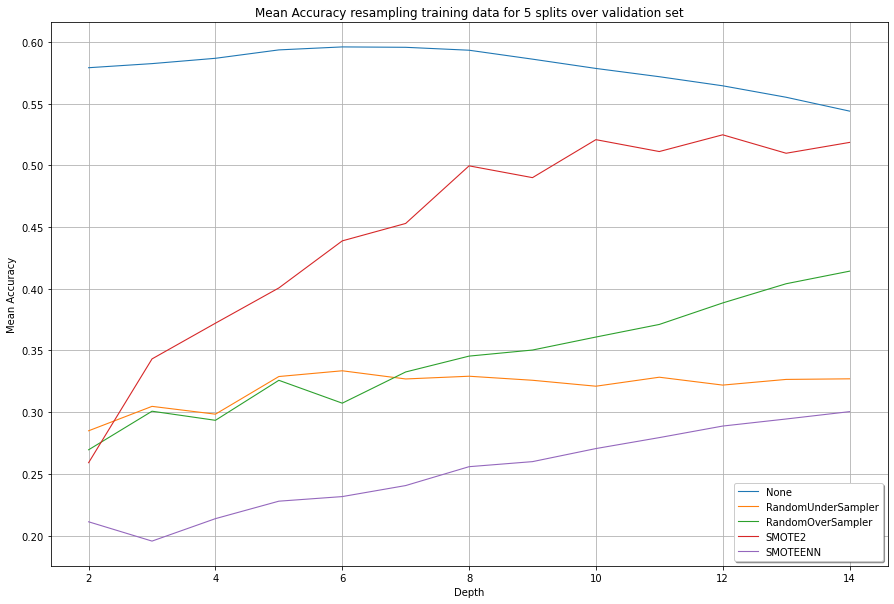

In [174]:
plt.figure(figsize=(15,10))

for resampling_method_name in resampling_methods:
    resampling_method = resampling_methods[resampling_method_name]

    mean_scores = resampling_method['accuracies_history']

    plt.plot(depths, mean_scores[:len(depths)], linewidth = 1.1, label = resampling_method_name)

plt.title(f"Mean Accuracy resampling training data for {splits} splits over validation set")
plt.xlabel('Depth')
plt.ylabel('Mean Accuracy')

plt.legend(loc = 'best',
           fancybox = True,
           shadow = True)

FILE_NAME  = f"{CLASSIFICATION_TREE_PATH}{MODEL_TIMESTAMP}.png"

plt.grid(True)
plt.savefig(FILE_NAME, dpi = resolution)
plt.show()

Observamos cómo el árbol de decisión entrenado sin aplicar técnicas de resampling a medida que avanzamos en su profundidad, el accudacy empieza a descender. Esto es común en los árboles de decisión con mcuha profundidad, ya que comienza a apreciarse el overfitting a medida que el número de niveles aumenta.

Esto no se produce con los métodos de Resampling ya que los árboles se entrenan con datos muy distintos en cada iteración, sin embargo, no logran superar el accuracy de `0.5958` que consigue el Árbol de Decisión entrenado sin Resampling con 6 niveles.

## Train Best Tree - Best Reampling

In [164]:
best_method_name = list(best_method.keys())[0]
X_train_sampled, y_train_sampled = do_resampling(best_method_name,
                                                 X_train,
                                                 y_train)

best_model = best_method[best_method_name]['best_model'].fit(X_train_sampled, y_train_sampled)

Gracias al `random_seed` especificado en el `cross-validation` podemos fijar que el resultado del experimento mantenga que el mejor árbol tenga como profundidad 6 niveles. Esto nos permite mantener los resultados en distintas ejecuciones y poder detallarlos.

Podemos observar que el error medio para el árbol de profundidad 6 es del orden de 0.42 aproximadamente (accuracy), es decir, que del 100% total de muestras en el dataset ha clasificado correctamente un 42% aproximadamente entre todas las clases del modelo.

En posteriores apartados analizaremos el resto de métricas, como el `recall` o el `f1-score`, que nos darán mayor información de cómo se está comportando el modelo.

## Tree Plot

A continuación mostraremos el desglose del árbol de decisión entrenado, como hemos visto en la sección anterior, el árbol con mejor precisión (`score`) es aquel que contiene **X** niveles de profundidad.

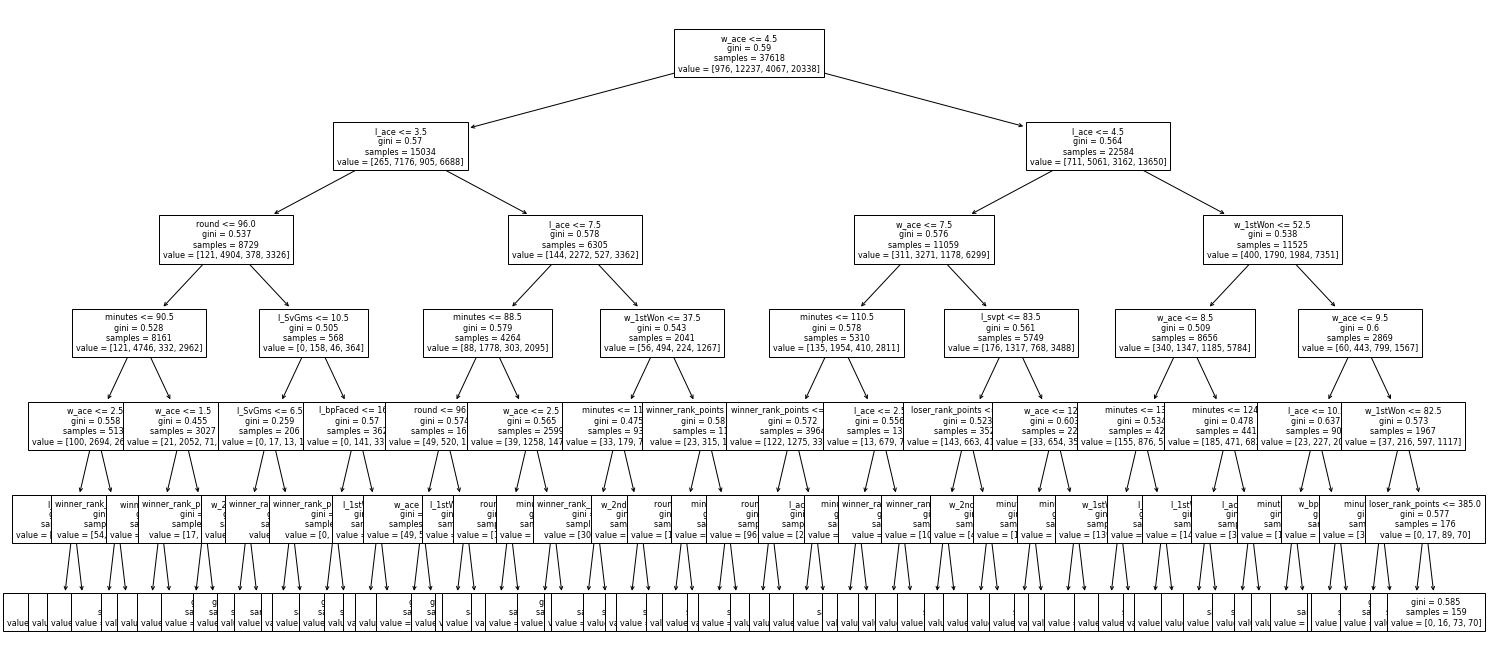

In [165]:
plt.figure(figsize=(25,12))
tree_plot = tree.plot_tree(best_model, fontsize = 8, feature_names = X_test.columns)

FILE_NAME = f"best_depth_{best_model.get_depth()}_tree_{MODEL_TIMESTAMP}"

plt.savefig(CLASSIFICATION_TREE_PATH + FILE_NAME, dpi = resolution)

El primer nodo padre del árbol divide los resultados en función del número de puntos ganados con saque directo del jugador que acabó ganando el partido, es decir, es el campo que mejor divide las observaciones en función del tipo de pista. Esto cobra sentido ya que los saques rebotan con más velocidad en pistas más rápidas (pista dura y hierba), por lo que son más difíciles de restar, y más fáciles de responder en pistas más lentas (tierra batida).

En los siguientes niveles se aprecia que existen otras variables influyentes como el número de puntos ganados con el primer servicio (cobra más ventaja en el partido el jugador que saque, ya que la velocidad de la bola es distinta dependiendo de la superficie).

La métrica Gini muestra la probabilidad que tienen las muestras que llegan a ese nodo de ser clasificadas incorrectamente cuando se les asigna una clase aleatoria.

El número de muestras que llegan al primer nodo es el total de todos los ejemplos en el dataset.

Este proceso se repite para cada uno de los nodos del árbol de decisión hasta llegar al último nivel, que es el que dictará a qué clase pertenece la muestra que haya recorrido el camino del árbol hasta llegar a la hoja correspondiente.


## Confusion Matrix

En esta sección analizaremos los resultados de la clasificación del árbol de clasificación obtenido en el apartado anterior, obteniendo la matriz de confusión de los resultados sobre el conjunto de test.

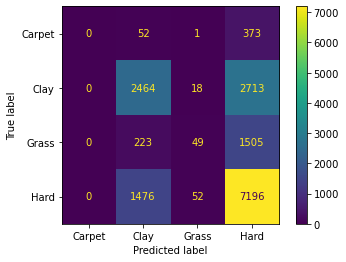

In [166]:
from sklearn.metrics import ConfusionMatrixDisplay

FILE_NAME = f"best_depth_{best_model.get_depth()}_cm_{MODEL_TIMESTAMP}.png"

confusion_matrix = ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test)
confusion_matrix.figure_.savefig(CONFUSION_MATRIX_PATH + FILE_NAME, dpi = resolution)

Observamos los resultados de la clasificación del conjunto de test, en el eje de ordenadas se proyectan las clases verdaderas a las que pertenecen las muestras, mientras que en el eje de abcisas se muestra la clasificación del árbol de decisión entrenado.

## Classification Report

En esta sección se mostrarán las métricas correspondientes a la clasificación de los datos del conjunto de test por parte del árbol de decisión.

In [175]:
from sklearn.metrics import classification_report

FILE_NAME = f"best_depth_{best_model.get_depth()}_cr_{MODEL_TIMESTAMP}.csv"


y_pred = best_model.predict(X_test)
report = classification_report(y_test, y_pred, output_dict = True)

report_df = pd.DataFrame(report).transpose()
report_df.to_csv(CLASSIFICATION_REPORTS_PATH + FILE_NAME, index= True)

display(report_df.style.highlight_max(subset = ['precision', 'recall'], color='green')\
                       .highlight_min(subset = ['precision', 'recall'], color='red'))

/home/luis/anaconda3/envs/TFM/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/luis/anaconda3/envs/TFM/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/luis/anaconda3/envs/TFM/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,precision,recall,f1-score,support
Carpet,0.000000,0.000000,0.000000,426.000000
Clay,0.584579,0.474302,0.523698,5195.000000
Grass,0.408333,0.027575,0.051661,1777.000000
Hard,0.610503,0.824851,0.701672,8724.000000
accuracy,0.602221,0.602221,0.602221,0.602221
macro avg,0.400854,0.331682,0.319258,16122.000000
weighted avg,0.563734,0.602221,0.554137,16122.000000


La `precision` representa el porcentaje real de acierto en la clasificación de muestras como verdaderas para cada una de las clases, mientras que el `recall` indica el porcentaje total identificado de las muestras de cada clase.

Observamos que el número de partidos clasificados como moqueta es 0, seguramente provocado por el desbalanceo del dataset y el pequeño número de muestras que existen de esta clase.

Como el Árbol de decisión trata de minimizar la pérdida media de las clasificaciones, al tener un número ínfimo de clases clasificadas como `Carpet` el hecho de clasificar erróneamente esta clase no afecta apenas a la media de errores, por lo tanto, maximiza la correcta clasificación de muestras mayoriatias.

Podemos concluir que con los datos disponibles, entrenando este clasificador no se han conseguido unos resultados muy prometedores respecto a los objetivos iniciales del proyecto.


## AUC-ROC Curve

En esta sección mostraremos la curva AUC-ROC de las clases clasificadas por el mejor modelo entrenado.

Una curva AUC-ROC representa una medida de rendimiento para problemas de clasificación, mide la separabilidad de las clases en función de las siguientes medidas:
- True positive Rate (TPR)
- False positive Rate (FPR)

[Understanding auc roc curve](https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5)

### OneHotEncoding

Para ello el primer paso será transformar las variables respuesta a formato one-hot encoding, que es la forma de representar vectorialmente las características de forma única. Esto nos ayudará para poder medir las discrepancias entre la probabilidad calculada por el modeo de que una muestra pertenezca a una clase y el valor real de dicha muestra.

[How to one-hot encode](https://machinelearningmastery.com/how-to-one-hot-encode-sequence-data-in-python/)

In [217]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(y_test)

onehot_encoder = OneHotEncoder(sparse = False)

integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded  = onehot_encoder.fit_transform(integer_encoded)



array(['Carpet', 'Clay', 'Grass', 'Hard'], dtype=object)

### Plot AUC-ROC Curve

A continuación crearemos la curva AUC-ROC para cada una de las clases identificadas por el modelo, siguiendo la siguiente referencia:  [ROC for multi-label classification](https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html)

In [ ]:
from sklearn import metrics
from sklearn.metrics import roc_curve, roc_auc_score, auc
import numpy as np
from itertools import cycle

y_pred_proba = best_model.predict_proba(X_test)
classes = best_model.classes_

fpr = dict()
tpr = dict()
roc_auc = dict()

for i, current_class in enumerate(classes):

    fpr[i], tpr[i], _ = roc_curve(onehot_encoded[:,i], y_pred_proba[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(onehot_encoded.ravel(), y_pred_proba.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])


all_fpr = np.unique(np.concatenate([fpr[i] for i in range(classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i, current_class in enumerate(classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= len(classes)

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(figsize=(25,12))

plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)

for i in range(len(classes)):
    plt.plot(
        fpr[i],
        tpr[i],
        label = "ROC curve of class {0} (area = {1:0.2f})".format(best_model.classes_[i], roc_auc[i])
    )


plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curves for classification")
plt.legend(loc="lower right")
plt.show()

FILE_NAME = f"DT_{best_model.get_depth()}_{MODEL_TIMESTAMP}.png"

plt.savefig(AUC_ROC_PATH + FILE_NAME, dpi = resolution)

NameError: name 'best_model' is not defined

Podemos observar cómo a medida que incrementamos el ratio de verdaderos positivos va aumentando el de falsos positivos.

Este es un comportamiento natural, ya que, si queremos una probabilidad cercana a uno para clasificar una clase, existe el riesgo de clasificar el resto de clases erróneamente debido a que la clase objetivo es única, aumentando así el ratio de falsos positivos.

Idealmente, en datos completamente separables y bien clasificados, al curva AUC debería adoptar un comportamiento muy cercano a cero en la tasa de falsos positivos cuando del valor en verdaderos positivos es cercano a 1.

# Decision Tree with GridSearch

En esta sección se buscarán los mejores parámetros mediante el método `GridSearch`, que tratará modificar los hiperparametros del árbol de clasificación con el objetivo de mejorar la precisión de los resultados.

Debido a limitación de recursos, se ha acotado el espacio de búsqueda de hiperparámetros.

Para la construcción del método `GridSearch` se utilizará un Pipeline que se compondrá de:
- `PCA`: Análisis de componentes principales que obtendrá los parámetros correspondientes con respecto a la iteración de `GridSearch`
- `DecisionTreeClassifier`: Árbol que se entrenará con los parámetros correspondientes a la iteración de `GridSearch`

In [ ]:
from sklearn import decomposition, datasets
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

X = atp
y = labels

pca = decomposition.PCA()
dec_tree = tree.DecisionTreeClassifier(random_state = 2)

pipe = Pipeline(steps=[('pca', pca),
                       ('dec_tree', dec_tree)])

n_components = list(range(1, X.shape[1]+1, 1))

criterion = ['gini', 'entropy']

depths = list(range(3,12))
min_impurity_decrease = [x/10000 for x in range(1, 900, 100)]
min_samples_split = list(range(15, 35, 3))


parameters = dict(pca__n_components = n_components,
                  dec_tree__criterion = criterion,
                  dec_tree__max_depth = depths,
                  dec_tree__min_impurity_decrease = min_impurity_decrease,
                  dec_tree__min_samples_split = min_samples_split)

clf_GS = GridSearchCV(pipe, parameters)
clf_GS.fit(X, y)

best_criterion = clf_GS.best_estimator_.get_params()['dec_tree__criterion']
best_max_depth = clf_GS.best_estimator_.get_params()['dec_tree__max_depth'] 
best_max_min_impurity_decrease = clf_GS.best_estimator_.get_params()['dec_tree__min_impurity_decrease'] 
best_min_samples_split = clf_GS.best_estimator_.get_params()['dec_tree__min_samples_split'] 

print('Best Criterion:', best_criterion)
print('Best Max Depth:', best_max_depth)
print('Best Max Min impurity decrease:', best_max_min_impurity_decrease)
print('Best Min Samples Split:', best_min_samples_split)
print('Best Number Of Components:', clf_GS.best_estimator_.get_params()['pca__n_components'])
print(clf_GS.best_estimator_.get_params()['dec_tree'])

Observamos que los parámetros que mejor se ajustan al modelo con nuestro conjunto de datos son `criterion='entropy', max_depth=7`.

Una vez hemos obtenido los parámetros que mejor minimizan el error de clasificación del árbol, entrenaremos el árbol con dichos parámetros mediante el método de validación cruzada.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold 
from sklearn import tree

splits = 10

cv = KFold(n_splits = splits, shuffle = True)

best_accuracy = 0

mean_score = 0.0
for train_index, test_index in cv.split(atp):

    x_train, y_train = atp.iloc[train_index], labels.iloc[train_index]
    x_test, y_test   = atp.iloc[test_index],  labels.iloc[test_index]

    model = DecisionTreeClassifier(criterion = best_criterion,
                                   max_depth = best_max_depth,
                                   random_state = 2)
    model.fit(x_train, y_train)

    accuracy = model.score(X_test,y_test)

    mean_score = mean_score + accuracy


mean_score = mean_score/splits

print("Mean: ", mean_score)
print("Done!")

## Tree plot

Mostraremos el árbol entrenado resultante con los parámetros escogidos por el método `GridSearch`.

In [ ]:
plt.figure(figsize=(25,12))

tree_plot = tree.plot_tree(best_model, fontsize = 8, feature_names = atp.columns)

FILE_NAME = f"gs_{best_criterion}_{best_max_depth}_tree_{MODEL_TIMESTAMP}"

plt.savefig(CLASSIFICATION_TREE_PATH + FILE_NAME, dpi = resolution)

Observamos que los primeros niveles son 

## Confusion Matrix

En esta sección analizaremos los resultados y las métricas obtenidas por el método `GridSearch`

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

# Save Confusion Matrix image
FILE_NAME = f"gs_{best_criterion}_{best_max_depth}_cm_{MODEL_TIMESTAMP}"

confusion_matrix = ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test)
confusion_matrix.figure_.savefig(CONFUSION_MATRIX_PATH + FILE_NAME, dpi = resolution)

Como en el caso de la matriz de confusión anterior, en el eje de las `x` tenemos los valores predecidos y en el eje de las `y` los valores verdaderos. Observamos que los resultados son ligeramente XX

## Classification Report

In [ ]:
from sklearn.metrics import classification_report

# Save Classification Report csv
FILE_NAME = f"gs_{best_criterion}_{best_max_depth}_cr_{MODEL_TIMESTAMP}.csv"

y_pred = model.predict(X_test)
report = classification_report(y_test, y_pred, output_dict = True)

report_df = pd.DataFrame(report).transpose()
report_df.to_csv(CLASSIFICATION_REPORTS_PATH + FILE_NAME, index= True)

display(report_df.style.highlight_max(subset = ['precision', 'recall'], color='green')\
                       .highlight_min(subset = ['precision', 'recall'], color='red'))

Observamos que la menor `precisión` y el menor `recall` se manifiestan en la clasificación de pistas duras, mientras que obtenemos los máximos valores en pistas de tierra batida.

Podemos concluir que con los datos disponibles, entrenando este clasificador no se han conseguido unos resultados muy prometedores respecto a los objetivos iniciales del proyecto.

## AUC-ROC Curve

Al igual que en el apartado 7, mostraremos la curva AUC-ROC que nos permitirá comprender la separabilidad de las clases.

In [ ]:
from sklearn import metrics
from sklearn.metrics import roc_curve, roc_auc_score, auc
import numpy as np
from itertools import cycle

y_pred_proba = best_model.predict_proba(X_test)
classes = best_model.classes_

fpr = dict()
tpr = dict()
roc_auc = dict()

for i, current_class in enumerate(classes):

    fpr[i], tpr[i], _ = roc_curve(onehot_encoded[:,i], y_pred_proba[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(onehot_encoded.ravel(), y_pred_proba.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])


all_fpr = np.unique(np.concatenate([fpr[i] for i in range(classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i, current_class in enumerate(classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= len(classes)

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(figsize=(25,12))

plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)

for i in range(len(classes)):
    plt.plot(
        fpr[i],
        tpr[i],
        label = "ROC curve of class {0} (area = {1:0.2f})".format(best_model.classes_[i], roc_auc[i])
    )


plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curves for classification")
plt.legend(loc="lower right")
plt.show()

FILE_NAME = f"GS_{best_model.get_depth()}_{MODEL_TIMESTAMP}.png"

plt.savefig(AUC_ROC_PATH + FILE_NAME, dpi = resolution)

Al igual que en el apartado anterior

# Conclusiones

En este proyecto hemos podido conocer las distintas técnicas que se pueden aplicar a la hora de construir árboles de decisión de clasificación.

Se han podido testar distintos métodos de Resampling para entrenar árboles de distinta profundidad y se han aplicado técnicas de búsqueda de hiperparámetros que tratan de minimizar el error producido en la predicción de las muestras.

Como futuras líneas de investigación se propone aumentar el espacio de búsqueda de los hiperparámetros mediante el método GridSearch, o incluso utilizar soluciones como las de los algoritmos genéticos para la optimización de hiperparámetros, que logran reducir considerablemente el tiempo empleado mediante GridSearch encontrando una solución aproximada a la óptima ya que utilizan funciones de pérdida heurísticas, en lugar de tener un comportamiento computacionalmente exponencial como es el caso del GridSearch al utilizar una búsqueda voraz.